<a href="https://colab.research.google.com/github/NLovePink/Inspirit-AI-Mentorship/blob/main/Student_Mental_Healthy_Psych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

In [ ]:
#@title Project Variables
id = "1aK8Mugsg6MMAJsRfmV3CmEKhGl3b1-az"

In [ ]:
#@title Importing DataSet
url = "https://drive.google.com/uc?id=" + id

student_health = pd.read_csv(url, header=0, encoding = 'latin1')
student_health.head()

,Student ID,Gender,Age,Socioeconomic Status,Depression Status,GPA,Graduation Status,Employment Status,Internship Participation,Academic Year
0,1001,Male,20,Medium,Untreated Depression,2.5,Not Graduated,Unemployed,No,Sophomore
1,1002,Female,21,High,No Depression,3.8,Graduated,Employed,Yes,Senior
2,1003,Male,22,Low,Treated Depression,3.2,Graduated,Employed,Yes,Senior
3,1004,Female,19,High,Untreated Depression,1.8,Not Graduated,Unemployed,No,Freshman
4,1005,Female,20,Medium,No Depression,3.5,Graduated,Employed,Yes,Junior


In [ ]:
print(student_health.shape)
print(len(student_health))
student_health['Age']

(130, 10)
130


,Age
0,20
1,21
2,22
3,19
4,20
...,...
125,22
126,23
127,21
128,22


In [ ]:
#@title Removing any null values

student_health.isnull().sum()
student_health = student_health.dropna()
print(student_health.head())

   Student ID  Gender  Age Socioeconomic Status     Depression Status  GPA  \
0        1001    Male   20               Medium  Untreated Depression  2.5   
1        1002  Female   21                 High         No Depression  3.8   
2        1003    Male   22                  Low    Treated Depression  3.2   
3        1004  Female   19                 High  Untreated Depression  1.8   
4        1005  Female   20               Medium         No Depression  3.5   

  Graduation Status Employment Status Internship Participation Academic Year  
0     Not Graduated        Unemployed                       No     Sophomore  
1         Graduated          Employed                      Yes        Senior  
2         Graduated          Employed                      Yes        Senior  
3     Not Graduated        Unemployed                       No      Freshman  
4         Graduated          Employed                      Yes        Junior  


In [ ]:
student_health.head(1)

,Student ID,Gender,Age,Socioeconomic Status,Depression Status,GPA,Graduation Status,Employment Status,Internship Participation,Academic Year
0,1001,Male,20,Medium,Untreated Depression,2.5,Not Graduated,Unemployed,No,Sophomore


In [ ]:
student_health.dtypes

,0
Student ID,int64
Gender,object
Age,int64
Socioeconomic Status,object
Depression Status,object
GPA,float64
Graduation Status,object
Employment Status,object
Internship Participation,object
Academic Year,object


In [ ]:
def get_categorical_gpa():
  gpa_categorical_features = []
  for i, row in student_health.iterrows():
    gpa = row['GPA']
    if gpa <= 2.0:
      category = 'terrible'
    elif gpa > 2.0 and gpa <= 3.0:
      category = 'better'
    else:
      category = 'great'
    gpa_categorical_features.append(category)
  return gpa_categorical_features

student_health['GPA_Cat'] = get_categorical_gpa()
student_health.head()

,Student ID,Gender,Age,Socioeconomic Status,Depression Status,GPA,Graduation Status,Employment Status,Internship Participation,Academic Year,GPA_Cat
0,1001,Male,20,Medium,Untreated Depression,2.5,Not Graduated,Unemployed,No,Sophomore,better
1,1002,Female,21,High,No Depression,3.8,Graduated,Employed,Yes,Senior,great
2,1003,Male,22,Low,Treated Depression,3.2,Graduated,Employed,Yes,Senior,great
3,1004,Female,19,High,Untreated Depression,1.8,Not Graduated,Unemployed,No,Freshman,terrible
4,1005,Female,20,Medium,No Depression,3.5,Graduated,Employed,Yes,Junior,great


In [ ]:
#@title Pre-processing the dataset
le = LabelEncoder()

############### Gender ###############
gender_features = student_health['Gender'].unique()
le.fit(gender_features)
student_health['Gender_Num'] = le.transform(student_health['Gender'])
student_health.head()

############### Socioeconomic Status ###############
SES_features = student_health['Socioeconomic Status'].unique()
le.fit(SES_features)
student_health['SES_Num'] = le.transform(student_health['Socioeconomic Status'])
student_health.head()

############### Depression Status ###############
DS_features = student_health['Depression Status'].unique()
le.fit(DS_features)
student_health['DS_Num'] = le.transform(student_health['Depression Status'])
student_health.head()
idx_to_classes = le.classes_

############### Graduation Status ###############
GS_features = student_health['Graduation Status'].unique()
le.fit(GS_features)
student_health['GS_Num'] = le.transform(student_health['Graduation Status'])
student_health.head()

############### Employment Status ###############
ES_features = student_health['Employment Status'].unique()
le.fit(ES_features)
student_health['ES_Num'] = le.transform(student_health['Employment Status'])
student_health.head()

############### Internship Participation ###############
IP_features = student_health['Internship Participation'].unique()
le.fit(IP_features)
student_health['IP_Num'] = le.transform(student_health['Internship Participation'])
student_health.head()

############### Academic Year ###############
AY_features = student_health['Academic Year'].unique()
le.fit(AY_features)
student_health['AY_Num'] = le.transform(student_health['Academic Year'])
student_health.head()

############### GPA ###############
GPA_features = student_health['GPA_Cat'].unique()
le.fit(GPA_features)
student_health['GPA_Num'] = le.transform(student_health['GPA_Cat'])

############### Output ###############
print(idx_to_classes)
student_health.head()

['No Depression' 'Treated Depression' 'Untreated Depression']


,Student ID,Gender,Age,Socioeconomic Status,Depression Status,GPA,Graduation Status,Employment Status,Internship Participation,Academic Year,GPA_Cat,Gender_Num,SES_Num,DS_Num,GS_Num,ES_Num,IP_Num,AY_Num,GPA_Num
0,1001,Male,20,Medium,Untreated Depression,2.5,Not Graduated,Unemployed,No,Sophomore,better,1,2,2,1,2,0,3,0
1,1002,Female,21,High,No Depression,3.8,Graduated,Employed,Yes,Senior,great,0,0,0,0,0,1,2,1
2,1003,Male,22,Low,Treated Depression,3.2,Graduated,Employed,Yes,Senior,great,1,1,1,0,0,1,2,1
3,1004,Female,19,High,Untreated Depression,1.8,Not Graduated,Unemployed,No,Freshman,terrible,0,0,2,1,2,0,0,2
4,1005,Female,20,Medium,No Depression,3.5,Graduated,Employed,Yes,Junior,great,0,2,0,0,0,1,1,1


<Axes: xlabel='GPA_Cat', ylabel='Count'>

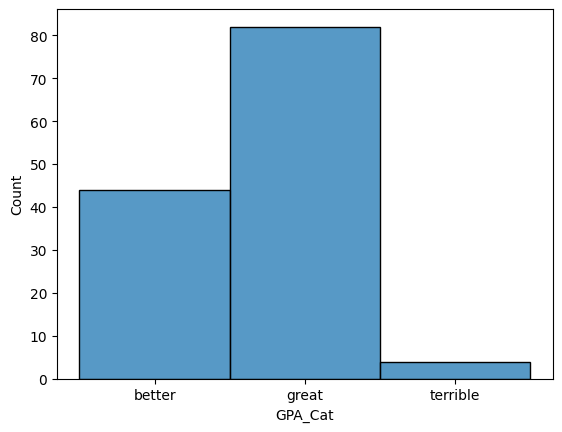

In [ ]:
#@title Data Visualization
sns.histplot(student_health['GPA_Cat'])

In [ ]:
# @title X & Y vectors
# student_health.columns
features = ['Gender_Num', 'SES_Num', 'GS_Num', 'ES_Num', 'IP_Num', 'AY_Num', 'GPA_Num']
X = student_health[features]
y = student_health['DS_Num']
print(X.shape)
print(y.shape)

# onehot_encoder = OneHotEncoder()
# Y_onehot = onehot_encoder.fit_transform(student_health['Depression Status'])
# Y_onehot
print(y.head())
X.head()

(130, 3)
(130,)
0    2
1    0
2    1
3    2
4    0
Name: DS_Num, dtype: int64


,Gender_Num,GS_Num,IP_Num
0,1,1,0
1,0,0,1
2,1,0,1
3,0,1,0
4,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
print("X_train dimension: ", X_train.shape)
print("X_test dimension: ", X_test.shape)
print("y_train dimension: ", y_train.shape)
print("y_test dimension: ", y_test.shape)
y_test

X_train dimension:  (91, 3)
X_test dimension:  (39, 3)
y_train dimension:  (91,)
y_test dimension:  (39,)


,DS_Num
8,0
3,2
39,0
85,1
10,2
101,1
21,2
43,2
71,0
84,0


In [ ]:
#@title Step 1: Initialize the model
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression()

In [ ]:
#@ Step 2: Train the model
regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#@ Step 3: Make predictions
predictions = regression_model.predict(X_test)
print(predictions)

for i in range(len(predictions)):
  print(idx_to_classes[predictions[i]])

[0 2 0 0 2 0 2 2 0 0 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 2 0 0 2 0 2 0 2 2 0 2
 0 0]
No Depression
Untreated Depression
No Depression
No Depression
Untreated Depression
No Depression
Untreated Depression
Untreated Depression
No Depression
No Depression
No Depression
No Depression
Untreated Depression
Untreated Depression
No Depression
No Depression
No Depression
No Depression
No Depression
Untreated Depression
Untreated Depression
No Depression
No Depression
No Depression
Untreated Depression
No Depression
Untreated Depression
No Depression
No Depression
Untreated Depression
No Depression
Untreated Depression
No Depression
Untreated Depression
Untreated Depression
No Depression
Untreated Depression
No Depression
No Depression


MAE:  0.20512820512820512
MSQ:  0.20512820512820512
Logistic Regression Model Accuracy: 79.49%


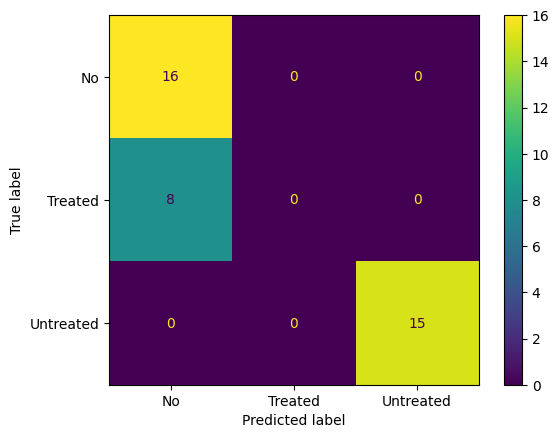

In [ ]:
#@ Step 4: Evaluation
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSQ: ", mean_squared_error(y_test, predictions))
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No", "Treated", "Untreated"])
disp.plot()
plt.show()

In [ ]:
#@title RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 42, max_depth=30)
random_forest_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_test)

MAE:  0.20512820512820512
MSQ:  0.20512820512820512
Logistic Regression Model Accuracy: 79.49%


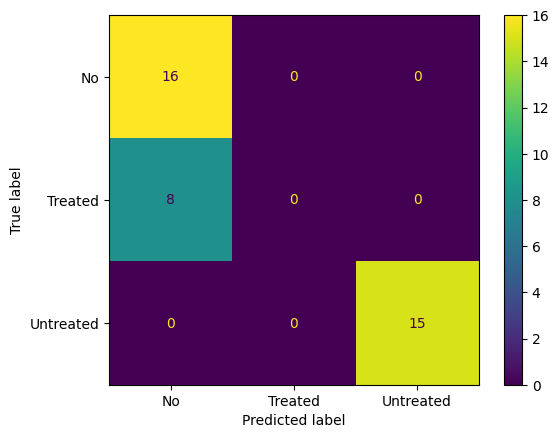

In [ ]:
#@title Step 4: Evaluation
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSQ: ", mean_squared_error(y_test, predictions))
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No", "Treated", "Untreated"])
disp.plot()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

MAE:  0.20512820512820512
MSQ:  0.20512820512820512
DecisionTreeClassifier Model Accuracy: 79.49%


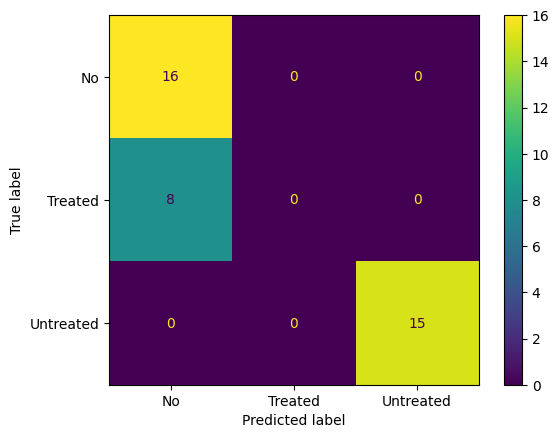

In [ ]:
#@title Step 4: Evaluation
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSQ: ", mean_squared_error(y_test, predictions))
score = accuracy_score(y_test, predictions)
print('DecisionTreeClassifier Model Accuracy: {:.2%}'.format(score))

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["No", "Treated", "Untreated"])
disp.plot()
plt.show()

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

/tmp/ipython-input-20-1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


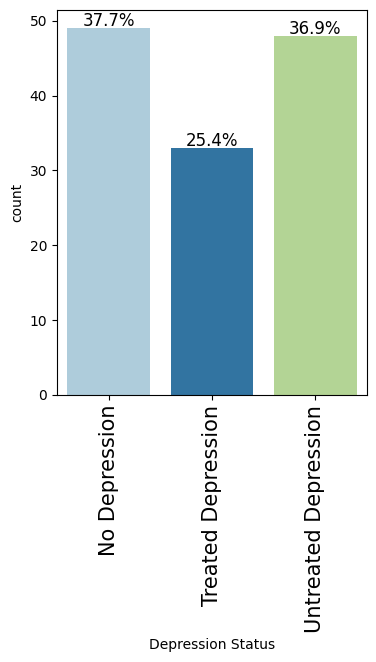

In [ ]:
labeled_barplot(student_health, "Depression Status", perc=True)

In [ ]:
#@title Neural Network
from sklearn.neural_network import MLPClassifier

# Initialize the model
nn = MLPClassifier(random_state=1, max_iter=300)

# Train the model
nn.fit(X_train, y_train)

# Test performance
nn.score(X_test, y_test)

0.7948717948717948